## First Innings Score Prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My\ Drive/IPL_score_predictor

/content/drive/My Drive/IPL_score_predictor


In [12]:
import nltk
nltk.download('stopwords')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import xgboost as xgb
from tqdm import tqdm
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.metrics import roc_curve, auc


# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )
import pickle

# Loading the dataset
df = pd.read_csv('ipl.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Exploratory Data Analysis and Data Preprocessing

In [8]:
df.shape

(76014, 15)

In [14]:
print(df['batsman'].value_counts())

SK Raina          1921
V Kohli           1825
S Dhawan          1730
RG Sharma         1726
MS Dhoni          1584
                  ... 
BAW Mendis           1
DT Patil             1
V Pratap Singh       1
T Henderson          1
LH Ferguson          1
Name: batsman, Length: 411, dtype: int64


In [18]:
#View the top types of batsman in our dataset whose frequency is greater than 500

batsman = df['batsman'].value_counts()
print('Number of batsman names are : {0}'.format(len(batsman)))
print(batsman[batsman > 500])

Number of batsman names are : 411
SK Raina            1921
V Kohli             1825
S Dhawan            1730
RG Sharma           1726
MS Dhoni            1584
DA Warner           1412
AM Rahane           1333
G Gambhir           1315
CH Gayle            1299
AB de Villiers      1295
RV Uthappa          1263
KD Karthik          1242
BB McCullum         1242
M Vijay             1131
SE Marsh            1120
SR Tendulkar        1062
AT Rayudu           1040
MEK Hussey          1020
JP Duminy            989
Yuvraj Singh         980
SR Watson            960
PA Patel             931
KA Pollard           919
DR Smith             914
R Dravid             906
V Sehwag             899
KC Sangakkara        867
YK Pathan            859
JH Kallis            839
MK Pandey            838
WP Saha              788
RA Jadeja            782
AC Gilchrist         763
S Badrinath          725
SC Ganguly           706
MK Tiwary            701
AJ Finch             682
NV Ojha              651
DJ Hussey       

In [34]:
batsmanList = []
for i in range(len(batsman[batsman > 500])):
  batsmanList.append(batsman.index[i])
print(batsmanList)

['SK Raina', 'V Kohli', 'S Dhawan', 'RG Sharma', 'MS Dhoni', 'DA Warner', 'AM Rahane', 'G Gambhir', 'CH Gayle', 'AB de Villiers', 'RV Uthappa', 'KD Karthik', 'BB McCullum', 'M Vijay', 'SE Marsh', 'SR Tendulkar', 'AT Rayudu', 'MEK Hussey', 'JP Duminy', 'Yuvraj Singh', 'SR Watson', 'PA Patel', 'KA Pollard', 'DR Smith', 'R Dravid', 'V Sehwag', 'KC Sangakkara', 'YK Pathan', 'JH Kallis', 'MK Pandey', 'WP Saha', 'RA Jadeja', 'AC Gilchrist', 'S Badrinath', 'SC Ganguly', 'MK Tiwary', 'AJ Finch', 'NV Ojha', 'DJ Hussey', 'DPMD Jayawardene', 'SPD Smith', 'SS Tiwary', 'BJ Hodge', 'DJ Bravo', 'LMP Simmons', 'TM Dilshan', 'F du Plessis', 'MC Henriques']


In [35]:
#Recode the batsman names keeping only top batsman names (all others at NA)
from pandas.api.types import CategoricalDtype
df.batsman= df.batsman.astype(CategoricalDtype(categories=batsmanList))

In [28]:
print(df['bowler'].value_counts())

Harbhajan Singh    1404
PP Chawla          1399
P Kumar            1386
SL Malinga         1333
UT Yadav           1304
                   ... 
V Shankar             6
DB Ravi Teja          6
SA Yadav              6
P Prasanth            6
C Nanda               6
Name: bowler, Length: 329, dtype: int64


In [21]:
#View the top types of bowler in our dataset whose frequency is greater than 500

bowler = df['bowler'].value_counts()
print('Number of bowler names are : {0}'.format(len(bowler)))
print(bowler[bowler > 500])

Number of bowler names are : 329
Harbhajan Singh    1404
PP Chawla          1399
P Kumar            1386
SL Malinga         1333
UT Yadav           1304
Z Khan             1222
A Mishra           1217
IK Pathan          1194
SP Narine          1185
JH Kallis          1144
SR Watson          1078
DJ Bravo           1053
R Vinay Kumar      1042
M Morkel           1035
RA Jadeja          1022
RP Singh           1008
A Nehra            1006
R Ashwin            993
B Kumar             952
DW Steyn            943
R Bhatia            925
PP Ojha             906
DS Kulkarni         802
AB Dinda            797
SK Trivedi          778
JP Faulkner         766
S Nadeem            754
JA Morkel           732
SK Warne            720
MM Patel            716
L Balaji            699
MM Sharma           693
I Sharma            670
M Muralitharan      646
YK Pathan           638
CH Morris           624
JJ Bumrah           610
A Kumble            590
KA Pollard          586
YS Chahal           581
AR Pate

In [30]:
bowlerList = []
for i in range(len(bowler[bowler > 500])):
  bowlerList.append(bowler.index[i])
print(bowlerList)

['Harbhajan Singh', 'PP Chawla', 'P Kumar', 'SL Malinga', 'UT Yadav', 'Z Khan', 'A Mishra', 'IK Pathan', 'SP Narine', 'JH Kallis', 'SR Watson', 'DJ Bravo', 'R Vinay Kumar', 'M Morkel', 'RA Jadeja', 'RP Singh', 'A Nehra', 'R Ashwin', 'B Kumar', 'DW Steyn', 'R Bhatia', 'PP Ojha', 'DS Kulkarni', 'AB Dinda', 'SK Trivedi', 'JP Faulkner', 'S Nadeem', 'JA Morkel', 'SK Warne', 'MM Patel', 'L Balaji', 'MM Sharma', 'I Sharma', 'M Muralitharan', 'YK Pathan', 'CH Morris', 'JJ Bumrah', 'A Kumble', 'KA Pollard', 'YS Chahal', 'AR Patel', 'VR Aaron', 'MJ McClenaghan', 'RJ Harris', 'Shakib Al Hasan', 'MG Johnson', 'Sandeep Sharma', 'B Lee']


In [32]:
#Recode the batsman names keeping only top batsman names (all others at NA)
from pandas.api.types import CategoricalDtype
df.bowler= df.bowler.astype(CategoricalDtype(categories=bowlerList))

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   mid             76014 non-null  int64   
 1   date            76014 non-null  object  
 2   venue           76014 non-null  object  
 3   bat_team        76014 non-null  object  
 4   bowl_team       76014 non-null  object  
 5   batsman         46911 non-null  category
 6   bowler          41565 non-null  category
 7   runs            76014 non-null  int64   
 8   wickets         76014 non-null  int64   
 9   overs           76014 non-null  float64 
 10  runs_last_5     76014 non-null  int64   
 11  wickets_last_5  76014 non-null  int64   
 12  striker         76014 non-null  int64   
 13  non-striker     76014 non-null  int64   
 14  total           76014 non-null  int64   
dtypes: category(2), float64(1), int64(8), object(4)
memory usage: 7.7+ MB


In [16]:
print(df['venue'].value_counts()) # venue, pitch type , weather conditions, country is important

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

In [37]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [38]:
df.tail()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
76009,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,NaN,NaN,121,7,19.2,40,0,129
76010,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,NaN,NaN,127,7,19.3,46,0,129
76011,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,NaN,NaN,128,7,19.4,47,0,129
76012,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,NaN,NaN,129,7,19.5,48,0,129
76013,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,NaN,NaN,129,8,19.6,47,1,129


In [39]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [40]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [41]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [42]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [43]:
df.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Z Khan,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,Z Khan,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,Z Khan,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,Z Khan,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,NaN,Z Khan,61,1,5.5,58,1,222


In [47]:
print('Batting team :',df['bat_team'].unique())
print('-'*100)
print('Bowling team :',df['bowl_team'].unique())

Batting team : ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
----------------------------------------------------------------------------------------------------
Bowling team : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [48]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [59]:
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

In [69]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team','venue','batsman', 'bowler', 'Year','Month' ])

In [70]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,venue_Barabati Stadium,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,venue_Eden Gardens,venue_Feroz Shah Kotla,venue_Himachal Pradesh Cricket Association Stadium,venue_Holkar Cricket Stadium,venue_JSCA International Stadium Complex,venue_Kingsmead,venue_M Chinnaswamy Stadium,"venue_MA Chidambaram Stadium, Chepauk",venue_Maharashtra Cricket Association Stadium,venue_New Wanderers Stadium,...,bowler_DS Kulkarni,bowler_AB Dinda,bowler_SK Trivedi,bowler_JP Faulkner,bowler_S Nadeem,bowler_JA Morkel,bowler_SK Warne,bowler_MM Patel,bowler_L Balaji,bowler_MM Sharma,bowler_I Sharma,bowler_M Muralitharan,bowler_YK Pathan,bowler_CH Morris,bowler_JJ Bumrah,bowler_A Kumble,bowler_KA Pollard,bowler_YS Chahal,bowler_AR Patel,bowler_VR Aaron,bowler_MJ McClenaghan,bowler_RJ Harris,bowler_Shakib Al Hasan,bowler_MG Johnson,bowler_Sandeep Sharma,bowler_B Lee,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Month_3,Month_4,Month_5,Month_6
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab',
       ...
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Month_3', 'Month_4', 'Month_5', 'Month_6'],
      dtype='object', length=164)

In [73]:
# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [74]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [75]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37330, 162), (2778, 162), (37330,), (2778,))

### Standardize the features

In [77]:
#Use standardscaler to standardize the features

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc   = sc.transform(X_test)

# MODELLING

## Let's also check feature importances

In [112]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

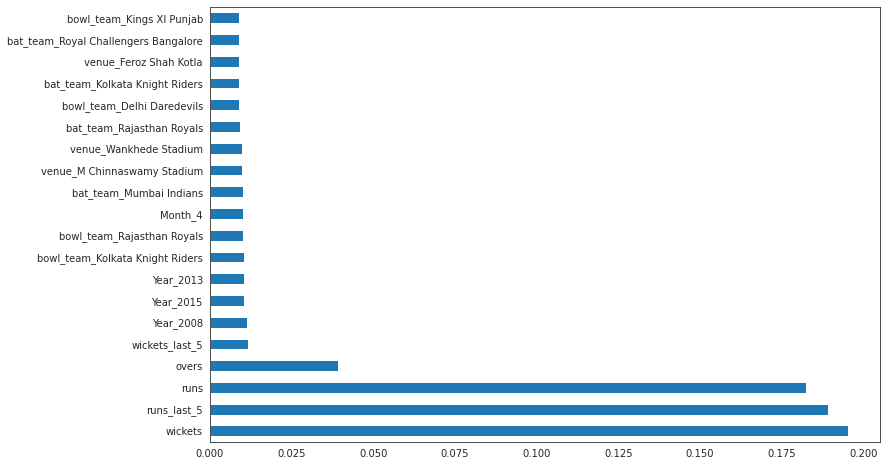

In [114]:

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Ridge Regression

In [78]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [79]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.36639e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56964e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.19495e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.21527e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.44724e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [80]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-366.0930960520157


In [86]:
ridge=Ridge(alpha=40)
ridge.fit(X_train,y_train)

Ridge(alpha=40, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [87]:
prediction=ridge.predict(X_test)

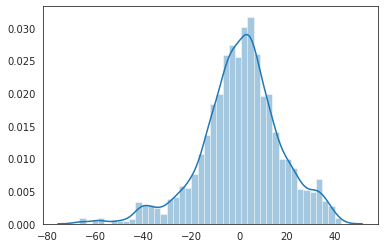

In [88]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [89]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.634091603917607
MSE: 281.34496995707894
RMSE: 16.773341049328216


In [101]:
# Creating a pickle file for the classifier
filename = 'ridge-model.pkl'
pickle.dump(ridge, open(filename, 'wb'))

## Lasso Regression

In [84]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [85]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4000104.2609477597, tolerance: 2529.9556965945594
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3821258.102362544, tolerance: 2547.038071028663
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3993817.220409596, tolerance: 2667.8126904366486
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3775791.5

{'alpha': 1}
-320.82214916809124


In [91]:
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [92]:
prediction=lasso.predict(X_test)

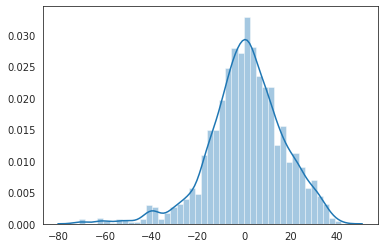

In [93]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [94]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.213583996827493
MSE: 262.3653827960697
RMSE: 16.197696836157593


In [102]:
# Creating a pickle file for the classifier
filename = 'lasso-model.pkl'
pickle.dump(lasso, open(filename, 'wb'))

## XGBoost

In [95]:
import xgboost as xgb

# initialize Our first XGBoost model...
regr = xgb.XGBRegressor(silent=True, random_state=15)

# declare parameters for hyperparameter tuning
parameters = {'learning_rate':[0.01,0.1],'n_estimators':[500,900,1000],'max_depth':[3,5]} 

# Perform cross validation 
clf = GridSearchCV(regr,
                    param_grid = parameters,
                    scoring="neg_mean_squared_error",
                    cv=2,
                    n_jobs = -1,
                    verbose = 1)
result = clf.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means = result.cv_results_['mean_test_score']
stds = result.cv_results_['std_test_score']
params = result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f 1(%f) with: %r" % (mean, stdev, param))

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 19.5min finished


Best: -397.202594 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 900}
-403.730791 1(37.214503) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
-397.202594 1(40.028094) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 900}
-398.250906 1(40.258144) with: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}
-412.065111 1(45.443531) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
-418.610178 1(46.807904) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 900}
-422.399201 1(45.728124) with: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000}
-426.739527 1(27.169879) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
-442.170799 1(19.918270) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 900}
-445.005352 1(18.393712) with: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
-458.016496 1(41.650292) with: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5

In [97]:
xgb1 = xgb.XGBRegressor(learning_rate= 0.01, max_depth= 3, n_estimators= 900, nthread=-1)
xgb1.fit(X_train, y_train)

[08:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [98]:
prediction=xgb1.predict(X_test)

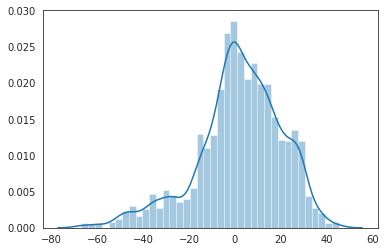

In [99]:
import seaborn as sns
sns.distplot(y_test-prediction)

In [100]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 14.373433156353352
MSE: 350.5005246772783
RMSE: 18.721659239428494


In [103]:
# Creating a pickle file for the classifier
filename = 'xgb-model.pkl'
pickle.dump(xgb1, open(filename, 'wb'))

## RandomForestRegressor

In [115]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [116]:
prediction=reg_rf.predict(X_test)

In [117]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 14.347411807055435
MSE: 357.42436137509003
RMSE: 18.905670085323344


In [118]:
# Creating a pickle file for the classifier
filename = 'rfr-model.pkl'
pickle.dump(reg_rf, open(filename, 'wb'))